In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import tensorflow as tf

import PIL
from PIL import Image

In [ ]:
silkroad_items = pd.read_csv('silkroad_items.csv')

In [ ]:
silkroad_items.head()

,item_id,title,description,vendor,price,category,timestamp,ships_from,ships_to,image_id,original_path
0,jj-luna-privacy-ebooks,JJ Luna privacy ebooks,\n JJ Luna is a top privacy consultant. \n\...,echo,0.001722,Alcohol,2014-02-23T05:39:22,Undeclared,Undeclared,NaN,2014-02-24/items/jj-luna-privacy-ebooks
1,the-morality-of-capitalism,The Morality of Capitalism,\n This book has been made available to the...,echo,0.003443,Alcohol,2014-02-23T05:39:29,Undeclared,Undeclared,343.0,2014-02-24/items/the-morality-of-capitalism
2,survive,Survive!,"\n Since the dawn of time, when man first p...",echo,0.001722,Alcohol,2014-02-23T05:39:33,Undeclared,Undeclared,334.0,2014-02-24/items/survive
3,a-non-religious-new-testament,A Non-Religious New Testament,\n This is essentially the Bible written in...,echo,0.015496,Alcohol,2014-02-23T05:39:37,Undeclared,Undeclared,352.0,2014-02-24/items/a-non-religious-new-testament
4,mindless-slogans-101-cheap-substitutes-for-act...,Mindless Slogans: 101 Cheap Substitutes for Ac...,\n Think of all the stupid stuff you overhe...,echo,0.001722,Alcohol,2014-02-23T05:39:41,Undeclared,Undeclared,337.0,2014-02-24/items/mindless-slogans-101-cheap-su...


In [ ]:
silkroad_items['image_id'].value_counts().nlargest(20)

1548.0     182
40.0       174
36.0       157
16243.0    152
12486.0    149
14403.0    148
9814.0     145
6213.0     145
8712.0     141
8648.0     139
1684.0     137
2342.0     136
2701.0     133
11600.0    132
1682.0     132
6437.0     130
2632.0     128
12484.0    127
74.0       126
8884.0     124
Name: image_id, dtype: int64

In [ ]:
silkroad_items_short = silkroad_items[['category','image_id']]
silkroad_items = None

In [ ]:
silkroad_items_short.head()

,category,image_id
0,Alcohol,NaN
1,Alcohol,343.0
2,Alcohol,334.0
3,Alcohol,352.0
4,Alcohol,337.0


In [ ]:
silkroad_items_short.shape

(401094, 2)

In [ ]:
silkroad_items_short.isnull().sum()

category        0
image_id    33421
dtype: int64

In [ ]:
silkroad_items_short.dropna(inplace = True)
silkroad_items_short.image_id = silkroad_items_short.image_id.astype(int)

In [ ]:
silkroad_items_short

,category,image_id
1,Alcohol,343
2,Alcohol,334
3,Alcohol,352
4,Alcohol,337
6,Drugs,293
...,...,...
401089,Anabolic Steroids,6254
401090,Methandrostenolone,10330
401091,Steroids/PEDs,10333
401092,Steroids/PEDs,28450


In [ ]:
a = silkroad_items_short[~silkroad_items_short.category.str.contains("Alcohol")]

In [ ]:
a['category'].value_counts().nlargest(10)

Stimulants            24372
Weed                  19587
Ecstasy               17947
MDMA                  16013
Cannabis              14496
Cocaine               13036
LSD                   10776
Speed                  8622
Drug paraphernalia     7776
Steroids/PEDs          7428
Name: category, dtype: int64

In [ ]:
top10 = a['category'].value_counts().nlargest(10)
top10 = list(top10.index)

In [ ]:
top10

['Stimulants',
 'Weed',
 'Ecstasy',
 'MDMA',
 'Cannabis',
 'Cocaine',
 'LSD',
 'Speed',
 'Drug paraphernalia',
 'Steroids/PEDs']

In [ ]:
data = a[(a.category.isin(top10))]

In [ ]:
a = None
silkroad_items_short = None

In [ ]:
data

,category,image_id
202,Stimulants,16537
203,Stimulants,26421
204,Stimulants,16510
207,Weed,7846
210,Weed,10752
...,...,...
401073,Ecstasy,3908
401074,MDMA,25192
401075,Drug paraphernalia,401
401091,Steroids/PEDs,10333


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data

,category,image_id
202,Stimulants,16537
203,Stimulants,26421
204,Stimulants,16510
207,Weed,7846
210,Weed,10752
...,...,...
400105,Cocaine,29771
400109,Cocaine,29759
400110,Speed,30641
400516,Cocaine,32402


In [ ]:
ids = data['image_id']

In [ ]:
data.dropna(inplace = True)
data.image_id = data.image_id.astype(int)

In [ ]:
import os.path

In [ ]:
dict = {}

for id in ids:
  ruta = "images_by_id/" + str(id) + ".jpg"
  if os.path.exists(ruta):
    if id in dict.keys():
      im = dict[id]
    else:
      im = Image.open(ruta)
    if(np.array(im).shape == (135,180,3)):
      dict[id] = np.array(im)

In [ ]:
valores = pd.DataFrame(list(dict.items()),columns = ['image_id','values'])

In [ ]:
dataset = valores.merge(data,on='image_id')

In [ ]:
valores = None
data = None

In [ ]:
dataset.drop('image_id', axis=1, inplace=True)

In [ ]:
dataset.isnull().sum()

values      0
category    0
dtype: int64

In [ ]:
dataset

,values,category
0,"[[[159, 161, 147], [160, 162, 148], [161, 163,...",Stimulants
1,"[[[150, 151, 145], [151, 152, 146], [152, 153,...",Stimulants
2,"[[[159, 165, 151], [160, 166, 152], [161, 167,...",Stimulants
3,"[[[251, 251, 251], [251, 251, 251], [251, 251,...",Weed
4,"[[[251, 251, 251], [251, 251, 251], [251, 251,...",Weed
...,...,...
14270,"[[[5, 5, 5], [5, 5, 5], [5, 5, 5], [5, 5, 5], ...",Cocaine
14271,"[[[4, 4, 4], [4, 4, 4], [4, 4, 4], [6, 6, 6], ...",Cocaine
14272,"[[[155, 45, 94], [143, 47, 95], [131, 47, 96],...",Speed
14273,"[[[24, 20, 9], [26, 22, 11], [38, 31, 21], [44...",Cocaine


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset.drop(columns = ['category']).copy()
y = dataset['category']

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.65)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.45)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_valid = le.transform(y_valid)

eye = np.eye(max(y_train.flatten())+1)
y_train_labels = np.asarray([eye[i] for i in y_train.flatten()])
y_valid_labels = np.asarray([eye[i] for i in y_valid.flatten()])

y_test_labels = le.transform(y_test)

In [ ]:
le.classes_

array(['Cannabis', 'Cocaine', 'Drug paraphernalia', 'Ecstasy', 'LSD',
       'MDMA', 'Speed', 'Steroids/PEDs', 'Stimulants', 'Weed'],
      dtype=object)

In [ ]:
print((X_train.shape,y_train_labels.shape))
print((X_valid.shape,y_valid_labels.shape))
print((X_test.shape,y_test_labels.shape))

((9278, 1), (9278, 10))
((2748, 1), (2748, 10))
((2249, 1), (2249,))


In [ ]:
X_train =(X_train['values']).to_numpy()
X_valid =(X_valid['values']).to_numpy()
X_test =(X_test['values']).to_numpy()

In [ ]:
X_train = np.array(X_train.tolist())
X_valid = np.array(X_valid.tolist())
X_test = np.array(X_test.tolist())

In [ ]:
print((X_train.shape,y_train_labels.shape))
print((X_valid.shape,y_valid_labels.shape))
print((X_test.shape,y_test_labels.shape))

((9278, 135, 180, 3), (9278, 10))
((2748, 135, 180, 3), (2748, 10))
((2249, 135, 180, 3), (2249,))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

train_generator.fit(X_train)
val_generator.fit(X_valid)
test_generator.fit(X_test)

In [ ]:
from tensorflow.keras.applications import ResNet50


feature_extractor = ResNet50(weights='imagenet', 
                             input_shape=(135, 180, 3),
                             include_top=False)


feature_extractor.trainable = False


input_ = tf.keras.Input(shape=(135, 180, 3))

x = feature_extractor(input_, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

output_ = tf.keras.layers.Dense(10, activation='sigmoid')(x)

model = tf.keras.Model(input_, output_)

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 135, 180, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 5, 6, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
hist = model.fit(train_generator.flow(X_train, y_train_labels, batch_size= 64),epochs = 50, validation_data = val_generator.flow(X_valid, y_valid_labels, batch_size = 64))

Epoch 1/50
145/145 [==============================] - 46s 266ms/step - loss: 0.2524 - accuracy: 0.4772 - val_loss: 0.2008 - val_accuracy: 0.5881
Epoch 2/50
145/145 [==============================] - 36s 246ms/step - loss: 0.1784 - accuracy: 0.6553 - val_loss: 0.1786 - val_accuracy: 0.6445
Epoch 3/50
145/145 [==============================] - 35s 243ms/step - loss: 0.1579 - accuracy: 0.7070 - val_loss: 0.1654 - val_accuracy: 0.6787
Epoch 4/50
145/145 [==============================] - 35s 242ms/step - loss: 0.1444 - accuracy: 0.7475 - val_loss: 0.1555 - val_accuracy: 0.7111
Epoch 5/50
145/145 [==============================] - 35s 244ms/step - loss: 0.1349 - accuracy: 0.7629 - val_loss: 0.1487 - val_accuracy: 0.7394
Epoch 6/50
145/145 [==============================] - 35s 243ms/step - loss: 0.1258 - accuracy: 0.7841 - val_loss: 0.1469 - val_accuracy: 0.7387
Epoch 7/50
145/145 [==============================] - 36s 246ms/step - loss: 0.1210 - accuracy: 0.7991 - val_loss: 0.1420 - val_ac

In [ ]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=1)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

In [ ]:
accuracy_score(y_test_labels.flatten(), preds)

0.8096931969764339

In [ ]:
import matplotlib.pyplot as plt

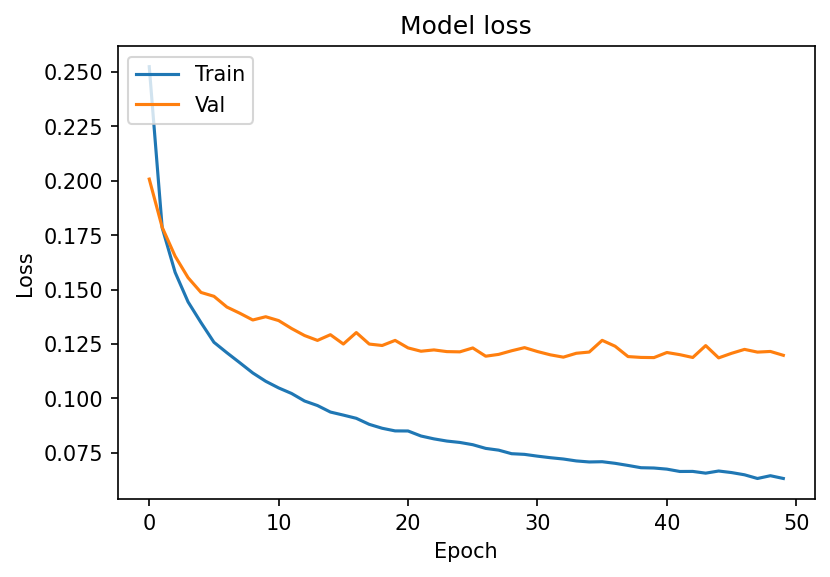

In [ ]:
plt.figure(dpi = 150)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

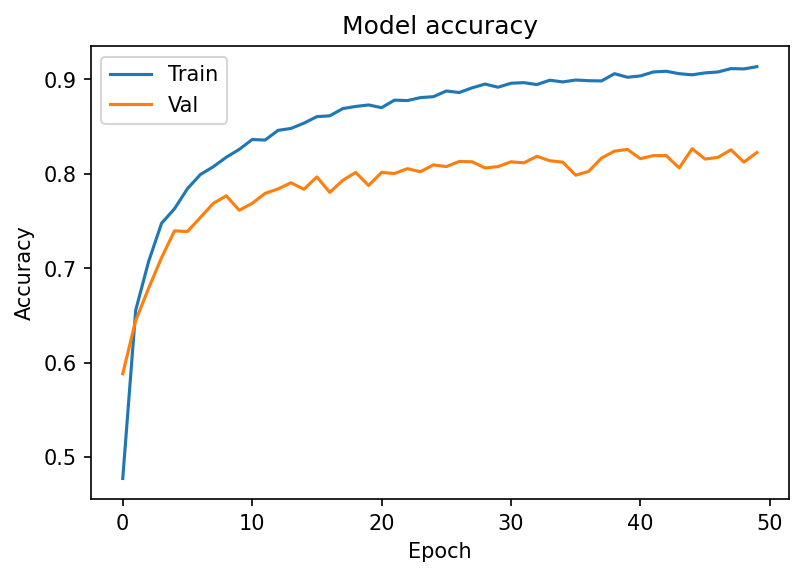

In [ ]:
plt.figure(dpi = 150)


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
import sklearn.metrics as metrics

In [ ]:
labels = list(le.classes_)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test_labels, y_pred=preds,normalize = 'true')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'Cannabis'),
  Text(0, 1.5, 'Cocaine'),
  Text(0, 2.5, 'Drug paraphernalia'),
  Text(0, 3.5, 'Ecstasy'),
  Text(0, 4.5, 'LSD'),
  Text(0, 5.5, 'MDMA'),
  Text(0, 6.5, 'Speed'),
  Text(0, 7.5, 'Steroids/PEDs'),
  Text(0, 8.5, 'Stimulants'),
  Text(0, 9.5, 'Weed')])

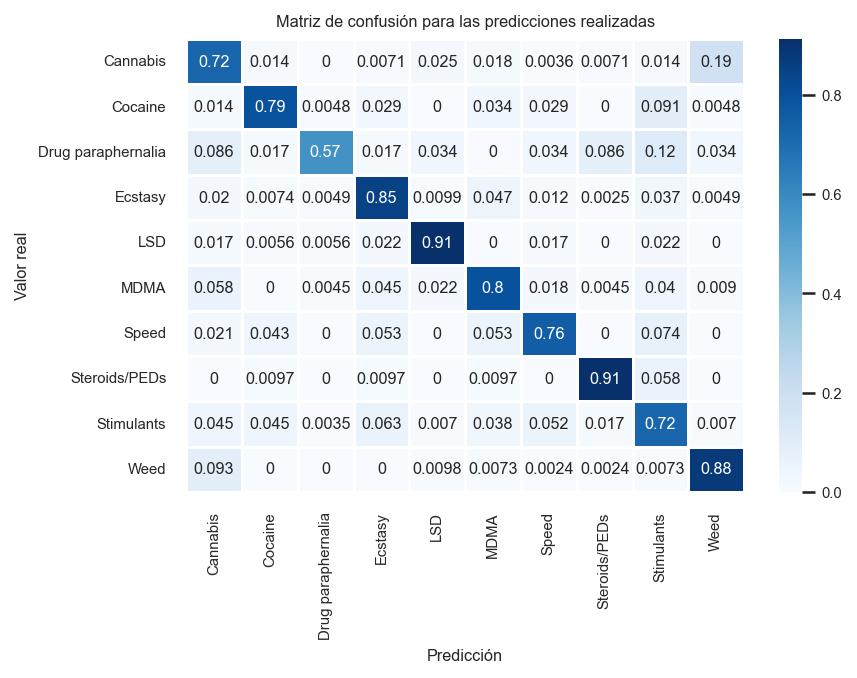

In [ ]:
plt.figure(dpi = 150)
ax = sns.heatmap(confusion_matrix,linewidths=.5,annot = True,cmap = 'Blues')

sns.set(font_scale=0.65)

ax.set_xlabel('Predicción')
ax.set_ylabel('Valor real')
ax.set_title('Matriz de confusión para las predicciones realizadas')

ax.set(xticklabels = labels)
ax.set(yticklabels = labels)

plt.xticks(rotation=90)
plt.yticks(rotation=0)